

# Análise dos Dados do Airbnb - Porto, Norte, Portugal

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade ________, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
data_base = pd.read_csv("http://data.insideairbnb.com/portugal/norte/porto/2021-07-10/visualisations/listings.csv")

In [3]:
# Visualizando os dados CSV em Tabela
data_base.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,41339,Porto city flat near the sea,180050,Paula,PORTO,Lordelo do Ouro e Massarelos,41.15010,-8.66035,Entire home/apt,95,5,17,2018-08-19,0.19,1,0
1,42462,Large Penthouse in Vila Nova Gaia,185492,Gabriela,VILA NOVA DE GAIA,Mafamude e Vilar do Paraíso,41.10739,-8.59430,Entire home/apt,73,90,39,2015-07-22,0.38,3,0
2,55111,Fontielas Houses |Floor1 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17481,-8.35362,Entire home/apt,66,3,14,2019-05-07,0.19,3,0
3,73828,Fontielas Houses |Floor0 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17449,-8.35426,Entire home/apt,66,3,8,2019-07-22,0.11,3,0
4,86388,A Formosa - a nest made for two,185209,João,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.14918,-8.60922,Private room,20,2,136,2019-04-26,1.16,6,160


## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de identificação gerado para o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de identificação do proprietário do imóvel
* `host_name` - Nome do proprietário do imóvel
* `neighbourhood_group` - Nome dos estados da região de Porto
* `neighbourhood` - Nome dos Municípios
* `latitude` - Coordenadas de latitude do imóvel
* `longitude` - Coordenadas de longitude do imóvel
* `room_type` - Informa o tipo de ímovel/quarto oferecido pelo proprietário
* `price` - Preço para alugar o ímovel/quarto oferecido pelo proprietário
* `minimum_nights` - Mínimo de dias que o ímovel/quarto pode ser alugado
* `number_of_reviews` - Número de reviews que o ímovel/quarto possui
* `last_review` - Data do último review
* `reviews_per_month` - Quantidade de reviews por mês
* `calculated_host_listings_count` - Quantidade de imóveis que o proprietário 
possui.
* `availability_365` - Número de dias de disponibilidade de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
data_base.head()
data_base['neighbourhood'].unique()

array(['Lordelo do Ouro e Massarelos', 'Mafamude e Vilar do Paraíso',
       'Cete', 'Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, Vitória',
       'Bonfim', 'Canidelo', 'Gulpilhares e Valadares',
       'Oliveira do Douro', 'Anta e Guetim', 'Paranhos', 'Campanhã',
       'Santa Marinha e São Pedro da Afurada', 'Madalena',
       'São Mamede de Infesta e Senhora da Hora',
       'Gondomar (São Cosme), Valbom e Jovim', 'Azurara',
       'Fornelo e Vairão', 'Avintes', 'Alvarenga', 'Vila do Conde',
       'São Pedro Fins', 'Melres e Medas',
       'Matosinhos e Leça da Palmeira', 'Alfena', 'Ramalde', 'Ermesinde',
       'Argoncilhe', 'Aldoar, Foz do Douro e Nevogilde',
       'Canelas e Espiunca', 'Rio Tinto', 'São Félix da Marinha',
       'Romariz', 'Pedrouços', 'Arcozelo',
       'Santa Maria da Feira, Travanca, Sanfins e Espargo',
       'Macieira de Cambra', 'São Pedro de Castelões',
       'Caldas de São Jorge e de Pigeiros', 'Arões', 'Espinho',
       'Campo e Sobrado', 'Póvoa de V

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Irei mostrar nesta seção a quantidade de entradas e os tipos de dados de cada coluna.

Este Dataset é uma versão resumida do Airbnb em um arquivo chamado `listings.csv`que pode ser conseguido [neste link](http://insideairbnb.com/get-the-data.html)


In [5]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(data_base.shape[0]))
print("Variáveis:\t {}\n".format(data_base.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(data_base.dtypes)

Entradas:	 10917
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
Vamos procurar aqui até que ponto os valores nulos podem interferir os valores de entrada.

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(data_base.isnull().sum() / data_base.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.195200
last_review                       0.195200
host_name                         0.000092
name                              0.000092
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
O histograma foi usado para identificar a distribuição das variáveis.

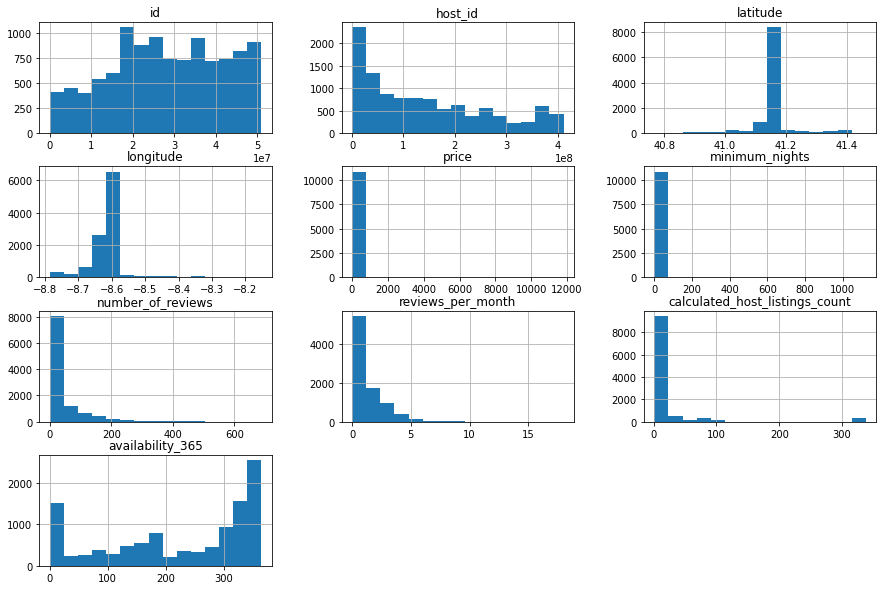

In [7]:
# plotar o histograma das variáveis numéricas
data_base.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**
Neste tópico tera uma analise simples do preço médio da díaria de um quarto/imóvel pelo Airbnb.

In [8]:
# ver a média da coluna `price``
media = data_base['price'].mean()
print(media)

93.12714115599523


### **Q5. Há outliers presentes?**


*   Percebesse que baseado no histograma da pergunta "Q3", houve alguns outliers. São eles `price`, `mininum_nights` e `calculated_host_listings_count`.
*   Esses valores criam uma distorção na distribuição nos valores. Duas maneiras de detectar outliers e usando a função `describe()` e o gráfico de `boxplots`.



In [9]:
# ver o resumo estatístico das variáveis numéricas
data_base[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,10917.000000,10917.000000,10917.000000,8786.000000,10917.000000,10917.000000
mean,93.127141,3.412934,40.463772,1.274784,20.359348,223.066593
std,329.697578,19.103641,69.340246,1.389660,59.682447,128.316735
min,8.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,43.000000,1.000000,1.000000,0.240000,1.000000,122.000000
50%,64.000000,2.000000,10.000000,0.785000,4.000000,270.000000
75%,91.000000,2.000000,48.000000,1.900000,9.000000,338.000000
max,11799.000000,1123.000000,687.000000,18.000000,338.000000,365.000000


Algumas hipoteses que se pode ver:


*   O preço da maioria das diarias em 75% na coluna `price`, possui um valor muito abaixo numa média de 91, comparado ao máximo que é 11799. Tendo assim uma disparidade muito grande.
*   A quantidade mínima de noites(`minimum_nights`), ultra passa o limite de 365 dias no ano, com o seu valor máximo de 1123 dias.



#### *Boxplot para minimum_nights*

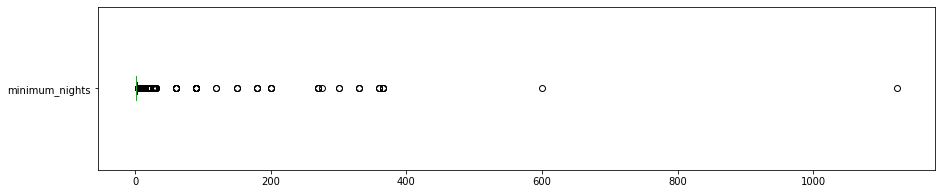

minimum_nights: valores acima de 30:
56 entradas
0.5130%


In [10]:
# minimum_nights
data_base.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(data_base[data_base.minimum_nights > 30])))
print("{:.4f}%".format((len(data_base[data_base.minimum_nights > 30]) / data_base.shape[0])*100))

#### *Boxplot para price*

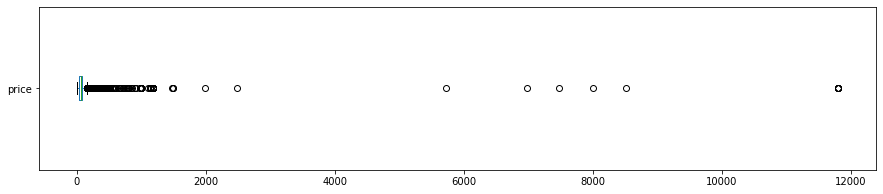


price: valores acima de 320
207 entradas
1.8961%


In [13]:
# price
data_base.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 320")
print("{} entradas".format(len(data_base[data_base.price > 320])))
print("{:.4f}%".format((len(data_base[data_base.price > 320]) / data_base.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### *Boxplot para calculated_host_listings_count*

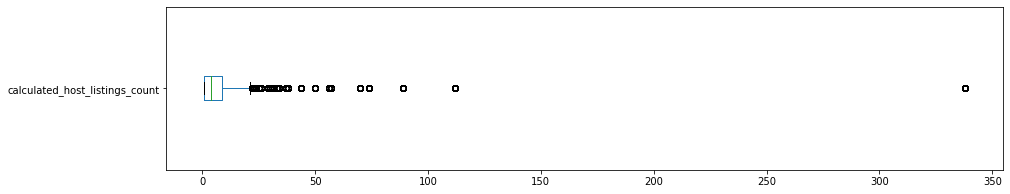


price: valores acima de 320
757 entradas
6.9341%


In [15]:
# calculated_host_listings_count
data_base.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 59 para calculated_host_listings_count
print("\nprice: valores acima de 320")
print("{} entradas".format(len(data_base[data_base.calculated_host_listings_count > 59])))
print("{:.4f}%".format((len(data_base[data_base.calculated_host_listings_count > 59]) / data_base.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### *Histogramas sem outliers*
Depois da descoberta dos outliers nas variaveis `price` e `mininum_nights`, iremos começar o processo de limpeza e plotar novamente os histogramas.

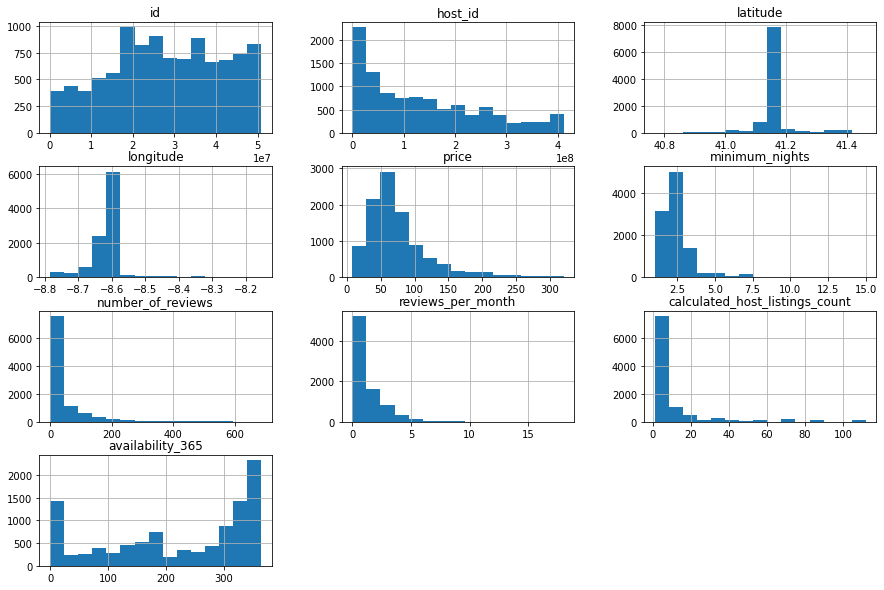

In [16]:
# remover os *outliers* em um novo DataFrame
database_clean = data_base.copy()
database_clean.drop(database_clean[database_clean.price > 320].index, axis=0, inplace=True)
database_clean.drop(database_clean[database_clean.minimum_nights > 15].index, axis=0, inplace=True)
database_clean.drop(database_clean[database_clean.calculated_host_listings_count > 150].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
database_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
database_clean.hist(bins=15, figsize=(15,10));

### **Q6. Qual a correlação existente entre as variáveis**
Correlação e encontrar semelhança ou relação entre variaveis.
Essa correlação sera medida por meio de um `matriz de correlação` e um `mapa de calor`.

In [14]:
# criar uma matriz de correlação
corr = database_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.080513,-0.093590,-0.126434,-0.057645,0.069334
minimum_nights,0.080513,1.000000,-0.017199,-0.072654,-0.050596,-0.075044
number_of_reviews,-0.093590,-0.017199,1.000000,0.720358,0.055860,0.009237
reviews_per_month,-0.126434,-0.072654,0.720358,1.000000,0.182640,0.079993
calculated_host_listings_count,-0.057645,-0.050596,0.055860,0.182640,1.000000,0.113373
availability_365,0.069334,-0.075044,0.009237,0.079993,0.113373,1.000000


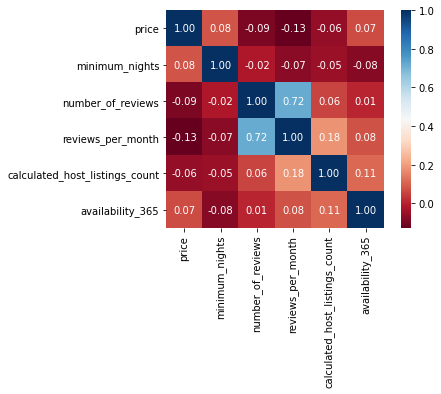

In [15]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**
Vamos ter a resposta baseado na variavel `room_type`, por mostrar os tipos de ímovel/quarto disponiveis e a quantidade. Para ter o número de ocorrência, vamos usar o método `value_counts()`.

In [17]:
# mostrar a quantidade de cada tipo de imóvel disponível
database_clean.room_type.value_counts()

Entire home/apt    8579
Private room       1996
Hotel room          164
Shared room         109
Name: room_type, dtype: int64

In [19]:
# mostrar a porcentagem de cada tipo de imóvel disponível
database_clean.room_type.value_counts() / database_clean.shape[0]

Entire home/apt    0.790837
Private room       0.183997
Hotel room         0.015118
Shared room        0.010048
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara dessa região?**
Para chegar nesta resposta, sera usado a função `groupby()` que compara as variaveis bairos(`neighbourhood`) e preço(`price`).



In [20]:
# ver preços por bairros, na média
database_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Negrelos (São Tomé)                  600.000000
Cristelo                             394.000000
Touguinha e Touguinhó                276.142857
Recarei                              250.000000
São Miguel do Mato                   246.000000
Areias, Sequeiró, Lama e Palmeira    243.800000
Sandim, Olival, Lever e Crestuma     240.538462
Avintes                              237.555556
Melres e Medas                       233.625000
Junqueira                            212.500000
Name: price, dtype: float64

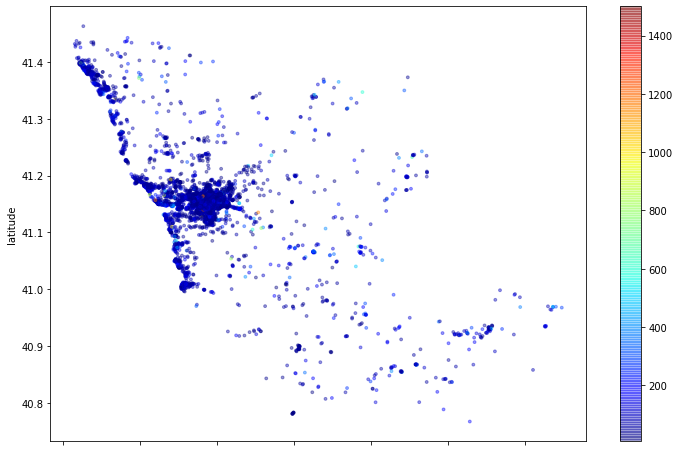

In [23]:
# plotar os imóveis pela latitude-longitude
database_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=database_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [24]:
# ver a média da coluna `minimum_nights``
media = database_clean['minimum_nights'].mean()
print(media)

2.405789085545723


## Conclusões



Esta analise foi feita de maneira superficial em cima de uma base de dados oficial do proprio Airbnb que pode ser encontrada facilmente no [seu site](http://insideairbnb.com/get-the-data.html), então foram poucos os insights conseguidos com isso. Alguns deles estão logo abaixo:

*   Norte de Porto, possui uma média bastante interessante de preço acessiveis tanto em regiões populares, nos grandes centros e mais caras.
*   Poucas correlações que foram encontradas foram no número de reviews com o número de reviews por mês, pelo formato resumido da base de dados conseguida.
*   Seria interessante ter dados como data, para fazer analises mais precisas de tendências e periodos onde existe maior busca por alugueis.



